In [ ]:
!pip install -q tensorflow-gpu==2.12.0

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
%load_ext tensorboard

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
logdir = 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.8995 - loss: 0.3317 - val_accuracy: 0.9788 - val_loss: 0.0626
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9873 - val_loss: 0.0449
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.9892 - loss: 0.0329 - val_accuracy: 0.9908 - val_loss: 0.0275
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9884 - val_loss: 0.0353
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9925 - val_loss: 0.0264


In [ ]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

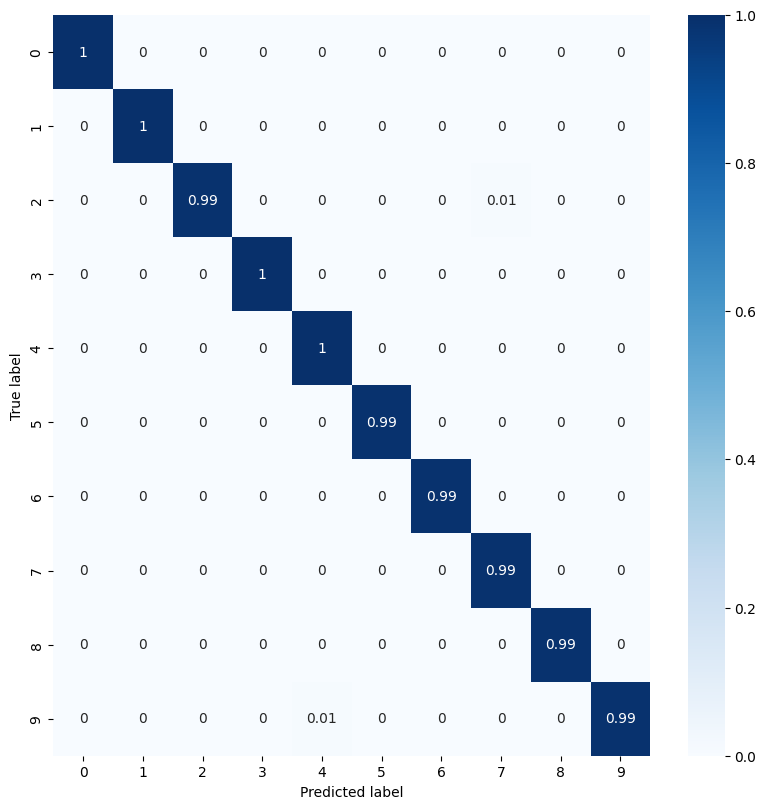

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true,predictions=y_pred.argmax(axis=1))
con_mat_norm = np.around(con_mat.numpy().astype('float') / con_mat.numpy().sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt

In [ ]:
# Instalar o scikit-learn
!pip install scikit-learn

# Importar bibliotecas
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Acurácia
accuracy = accuracy_score(y_true, y_pred.argmax(axis=1))
print("Acurácia:", accuracy)

# Sensibilidade
sensitivity = recall_score(y_true, y_pred.argmax(axis=1), average='macro')
print("Sensibilidade:", sensitivity)

# Precisão
precision = precision_score(y_true, y_pred.argmax(axis=1), average='macro')
print("Precisão:", precision)

# F1-Score
f1 = f1_score(y_true, y_pred.argmax(axis=1), average='macro')
print("F1-Score:", f1)

Acurácia: 0.9925
Sensibilidade: 0.9924600601060878
Precisão: 0.9924856792869594
F1-Score: 0.9924633372252363


AUC: 0.5118201049821258


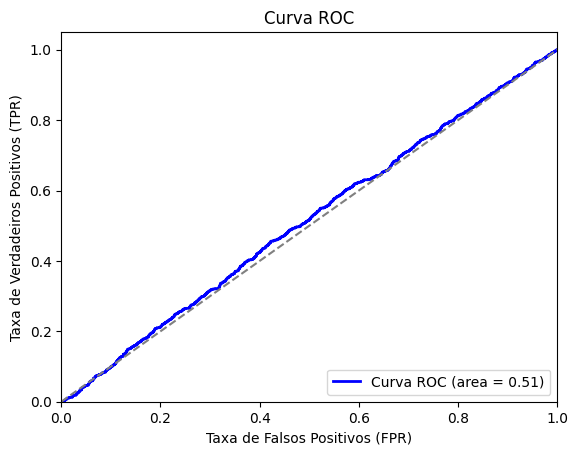

In [ ]:
y_prob = [0.1, 0.9, 0.2, 0.8, 0.3, 0.4, 0.7, 0.6, 0.85, 0.05]

from sklearn.preprocessing import label_binarize

# Ensure y_true_binary and y_prob have the same number of samples
y_true_binary = label_binarize(y_true, classes=[0]) # Convert to binary for class 0
# If y_true has 10000 samples, generate y_prob with 10000 samples
y_prob = np.random.rand(10000) # Example: Generate random probabilities

# Now you can use roc_curve for this binary class:
fpr, tpr, thresholds = roc_curve(y_true_binary, y_prob)

# Gerar os valores da curva ROC

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
